# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [90]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## 1. Data Cleaning

In [91]:
'''
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: default on payments : 1- yes. 0- no

more on data dictionary at: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
''';

In [92]:
df = pd.read_csv('training_data.csv')

In [93]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,28835,220000,2,1,2,36,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,2,3,2,29,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
2,18894,180000,2,1,2,27,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 25 columns):
Unnamed: 0    22500 non-null object
X1            22500 non-null object
X2            22500 non-null object
X3            22500 non-null object
X4            22500 non-null object
X5            22500 non-null object
X6            22500 non-null object
X7            22500 non-null object
X8            22500 non-null object
X9            22500 non-null object
X10           22500 non-null object
X11           22500 non-null object
X12           22500 non-null object
X13           22500 non-null object
X14           22500 non-null object
X15           22500 non-null object
X16           22500 non-null object
X17           22500 non-null object
X18           22500 non-null object
X19           22500 non-null object
X20           22500 non-null object
X21           22500 non-null object
X22           22500 non-null object
X23           22500 non-null object
Y             22500 non-nul

In [95]:
cols = ['Unnamed: 0', 'X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23','Y']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [96]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,28835.0,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,...,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0
1,25329.0,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0
2,18894.0,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,690.0,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,...,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0
4,6239.0,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,...,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0


In [97]:
rnm_dict = {'Unnamed: 0': 'id',
            'X1' :'given_credit',
            'X2' :'gender',
            'X3' :'education',
            'X4' :'mar_status',
            'X5' :'age',
            'X6' :'paystatus_09',
            'X7' :'paystatus_08',
            'X8' :'paystatus_07',
            'X9' :'paystatus_06',
            'X10':'paystatus_05',
            'X11':'paystatus_04',
            'X12':'billamt_09',
            'X13':'billamt_08',
            'X14':'billamt_07',
            'X15':'billamt_06',
            'X16':'billamt_05',
            'X17':'billamt_04',
            'X18':'payamt_09', 
            'X19':'payamt_08',
            'X20':'payamt_07',
            'X21':'payamt_06',
            'X22':'payamt_05',
            'X23':'payamt_04',
            'Y':'defaulted'}

df.rename(columns = rnm_dict, inplace = True)

In [98]:
# verify columns were renamed.
df.columns

Index(['id', 'given_credit', 'gender', 'education', 'mar_status', 'age',
       'paystatus_09', 'paystatus_08', 'paystatus_07', 'paystatus_06',
       'paystatus_05', 'paystatus_04', 'billamt_09', 'billamt_08',
       'billamt_07', 'billamt_06', 'billamt_05', 'billamt_04', 'payamt_09',
       'payamt_08', 'payamt_07', 'payamt_06', 'payamt_05', 'payamt_04',
       'defaulted'],
      dtype='object')

In [99]:
# check for nan values
df.isna().sum()

id              1
given_credit    1
gender          1
education       1
mar_status      1
age             1
paystatus_09    1
paystatus_08    1
paystatus_07    1
paystatus_06    1
paystatus_05    1
paystatus_04    1
billamt_09      1
billamt_08      1
billamt_07      1
billamt_06      1
billamt_05      1
billamt_04      1
payamt_09       1
payamt_08       1
payamt_07       1
payamt_06       1
payamt_05       1
payamt_04       1
defaulted       1
dtype: int64

In [100]:
# drop nan values from data set.

df = df.dropna(axis=0)

In [101]:
df.dtypes

id              float64
given_credit    float64
gender          float64
education       float64
mar_status      float64
age             float64
paystatus_09    float64
paystatus_08    float64
paystatus_07    float64
paystatus_06    float64
paystatus_05    float64
paystatus_04    float64
billamt_09      float64
billamt_08      float64
billamt_07      float64
billamt_06      float64
billamt_05      float64
billamt_04      float64
payamt_09       float64
payamt_08       float64
payamt_07       float64
payamt_06       float64
payamt_05       float64
payamt_04       float64
defaulted       float64
dtype: object

In [102]:
# cast current dtypes to appropriate based on the details of the features.
int_list = ['id', 'gender', 'education', 'mar_status', 'age', 'paystatus_09', 'paystatus_08', 'paystatus_07', 'paystatus_06', 'paystatus_05', 'paystatus_04','defaulted']

for i in int_list:
    df[i] = df[i].astype('int')

In [103]:
df.dtypes

id                int64
given_credit    float64
gender            int64
education         int64
mar_status        int64
age               int64
paystatus_09      int64
paystatus_08      int64
paystatus_07      int64
paystatus_06      int64
paystatus_05      int64
paystatus_04      int64
billamt_09      float64
billamt_08      float64
billamt_07      float64
billamt_06      float64
billamt_05      float64
billamt_04      float64
payamt_09       float64
payamt_08       float64
payamt_07       float64
payamt_06       float64
payamt_05       float64
payamt_04       float64
defaulted         int64
dtype: object

In [104]:
# sort values based on limit balance. 

df.sort_values(by='given_credit', ascending=False,inplace=True)

In [105]:
df.head()

,id,given_credit,gender,education,mar_status,age,paystatus_09,paystatus_08,paystatus_07,paystatus_06,...,billamt_06,billamt_05,billamt_04,payamt_09,payamt_08,payamt_07,payamt_06,payamt_05,payamt_04,defaulted
22108,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0
11613,14920,800000.0,1,2,1,53,-1,-1,-1,0,...,40814.0,12590.0,9339.0,11145.0,64657.0,131.0,247.0,9366.0,63482.0,0
13516,28716,780000.0,2,2,2,41,-2,-2,-2,-2,...,21482.0,72628.0,182792.0,62819.0,39558.0,22204.0,82097.0,184322.0,25695.0,0
18117,24321,780000.0,1,1,1,48,0,0,0,0,...,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
21388,10090,750000.0,2,1,1,41,0,0,0,0,...,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0,0


In [106]:
df.defaulted.value_counts() # class imbalance in defaulted column.

0    17471
1     5028
Name: defaulted, dtype: int64

In [107]:
df.gender.value_counts() # class imbalance, appropriate choices are represented.

2    13572
1     8927
Name: gender, dtype: int64

In [108]:
df.education.value_counts()

2    10516
1     7919
3     3713
5      208
4       90
6       42
0       11
Name: education, dtype: int64

In [109]:
# no information for extraneous values could be found. group all education values of 0,5,6
# as 4's since 4 represents 'other' for education extent.

df.education = np.where( df.education > 4, 4, df.education ) 
df.education = np.where( df.education < 1, 4, df.education ) 

In [110]:
#verify change 
df.education.value_counts()

2    10516
1     7919
3     3713
4      351
Name: education, dtype: int64

In [111]:
# value codes for this field only take on values 1,2,3 where 3 indicates 'other'. Group 0's into 3 category
df.mar_status.value_counts()

2    12026
1    10195
3      234
0       44
Name: mar_status, dtype: int64

In [112]:
df.mar_status = np.where( df.mar_status < 1, 3 , df.mar_status ) 

In [113]:
df.mar_status

22108    1
11613    1
13516    2
18117    1
21388    1
        ..
20248    2
4123     1
10227    2
16823    2
2334     2
Name: mar_status, Length: 22499, dtype: int64

In [114]:
# age feature looks ok.

df.age.describe()

count    22499.000000
mean        35.447931
std          9.237634
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: age, dtype: float64

In [115]:
# check values for paystatus mm: 09->04, the values make sense. the 0 code was not included in the data dictionary. Assumption: 0 is debts paid, no outstanding balance.

df.paystatus_04.value_counts()

 0    12233
-1     4284
-2     3663
 2     2078
 3      140
 7       38
 4       38
 6       14
 5        9
 8        2
Name: paystatus_04, dtype: int64

In [11]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('defaulted', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['defaulted'] # y is the column we're trying to predict

## 2. EDA

## 3. Feature Engineering

In [116]:
# create feature of percentage of monthly bill paid.

df['pay_ratio_09'] = (df['payamt_09']/df['billamt_09'])
df['pay_ratio_08'] = (df['payamt_08']/df['billamt_08'])
df['pay_ratio_07'] = (df['payamt_07']/df['billamt_07'])
df['pay_ratio_06'] = (df['payamt_06']/df['billamt_06'])
df['pay_ratio_05'] = (df['payamt_05']/df['billamt_05'])
df['pay_ratio_04'] = (df['payamt_04']/df['billamt_04'])

In [117]:
df.pay_ratio_09.value_counts()

0.000000    2824
1.000000     521
inf          411
2.000000      44
0.500000      10
            ... 
0.152985       1
1.759631       1
0.008313       1
0.039733       1
0.162868       1
Name: pay_ratio_09, Length: 17495, dtype: int64

In [118]:
df.pay_ratio_09.isna().sum()

1081

In [119]:
# for individuals with a current account, ratios will give an inf or nan... fill those values with 1 to proxy for indicating complete payment although payment not necessary.

df.pay_ratio_09.fillna(1, inplace=True)
df.pay_ratio_08.fillna(1, inplace=True)
df.pay_ratio_07.fillna(1, inplace=True)
df.pay_ratio_06.fillna(1, inplace=True)
df.pay_ratio_05.fillna(1, inplace=True)
df.pay_ratio_04.fillna(1, inplace=True)

In [120]:
df.pay_ratio_08.value_counts()

0.000000    2665
1.000000    1871
inf          478
2.000000      49
0.500000      12
            ... 
0.324232       1
5.592841       1
0.002612       1
0.062304       1
0.392839       1
Name: pay_ratio_08, Length: 17295, dtype: int64

In [121]:
# handle remaining erroneous values (inf or >1)
df.pay_ratio_09 = np.where(((df.pay_ratio_09 < 0)|(df.pay_ratio_09 > 1)), 1, df.pay_ratio_09)
df.pay_ratio_08 = np.where(((df.pay_ratio_08 < 0)|(df.pay_ratio_08 > 1)), 1, df.pay_ratio_08)
df.pay_ratio_07 = np.where(((df.pay_ratio_07 < 0)|(df.pay_ratio_07 > 1)), 1, df.pay_ratio_07)
df.pay_ratio_06 = np.where(((df.pay_ratio_06 < 0)|(df.pay_ratio_06 > 1)), 1, df.pay_ratio_06)
df.pay_ratio_05 = np.where(((df.pay_ratio_05 < 0)|(df.pay_ratio_05 > 1)), 1, df.pay_ratio_05)
df.pay_ratio_04 = np.where(((df.pay_ratio_04 < 0)|(df.pay_ratio_04 > 1)), 1, df.pay_ratio_04)

In [56]:
df.pay_ratio_08.value_counts()

1.000000    4999
0.000000    2665
0.500000      12
0.264766       8
0.102669       4
            ... 
0.037159       1
0.344444       1
0.083818       1
0.070294       1
0.152905       1
Name: pay_ratio_08, Length: 14731, dtype: int64

In [122]:
# Create columns for avg bill statement, average amount paid, gross pay ratio.

df['avg_bill_stmt'] = (df.billamt_09 + df.billamt_08 + df.billamt_07 + df.billamt_06 + df.billamt_05 + df.billamt_04) / 6

df['avg_amt_paid'] = (df.payamt_09 + df.payamt_08 + df.payamt_07 + df.payamt_06 + df.payamt_05 + df.payamt_04) / 6

df['gross_pay_ratio']= df.avg_amt_paid / df.avg_bill_stmt

In [123]:
# Handle non-bormal values in gross pay ratio column

df.gross_pay_ratio.fillna(1, inplace=True)
df.replace(np.inf, 1, inplace=True)
df.gross_pay_ratio = np.where(((df.gross_pay_ratio < 0)|(df.gross_pay_ratio > 1)), 1, df.gross_pay_ratio)

In [124]:
df.head()

,id,given_credit,gender,education,mar_status,age,paystatus_09,paystatus_08,paystatus_07,paystatus_06,...,defaulted,pay_ratio_09,pay_ratio_08,pay_ratio_07,pay_ratio_06,pay_ratio_05,pay_ratio_04,avg_bill_stmt,avg_amt_paid,gross_pay_ratio
22108,2198,1000000.0,2,1,1,47,0,0,0,-1,...,0,0.052653,0.051551,1.000000,0.056080,0.053927,0.052259,877313.833333,191300.500000,0.218053
11613,14920,800000.0,1,2,1,53,-1,-1,-1,0,...,0,1.000000,1.000000,0.002030,0.006052,0.743924,1.000000,23411.500000,24838.000000,1.000000
13516,28716,780000.0,2,2,2,41,-2,-2,-2,-2,...,0,0.616132,0.640979,0.573954,1.000000,1.000000,0.140570,79876.666667,69449.166667,0.869455
18117,24321,780000.0,1,1,1,48,0,0,0,0,...,0,0.058323,0.084015,0.052449,0.041000,0.054243,0.036648,185299.166667,10005.833333,0.053998
21388,10090,750000.0,2,1,1,41,0,0,0,0,...,0,0.037044,0.014256,0.029159,0.671819,0.138453,0.112497,92716.666667,11361.500000,0.122540


In [125]:
df.describe()

,id,given_credit,gender,education,mar_status,age,paystatus_09,paystatus_08,paystatus_07,paystatus_06,...,defaulted,pay_ratio_09,pay_ratio_08,pay_ratio_07,pay_ratio_06,pay_ratio_05,pay_ratio_04,avg_bill_stmt,avg_amt_paid,gross_pay_ratio
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,14951.920308,167054.521534,1.603227,1.844260,1.559225,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,...,0.223477,0.303204,0.315860,0.311864,0.306397,0.328164,0.348377,45078.972125,5292.854497,0.344726
std,8663.502421,129864.960118,0.489239,0.745099,0.520785,9.237634,1.123191,1.197954,1.198880,1.174824,...,0.416584,0.392584,0.401119,0.407479,0.408008,0.417028,0.425910,63716.533656,10528.220177,0.380805
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56043.166667,0.000000,0.000000
25%,7419.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.038085,0.037787,0.032713,0.031667,0.035590,0.035410,4726.000000,1100.000000,0.043058
50%,14947.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.070375,0.071693,0.058782,0.050391,0.055751,0.059898,20896.833333,2382.166667,0.105698
75%,22441.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.556391,0.681358,0.735916,0.702730,0.960831,1.000000,57103.416667,5583.750000,0.711362
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,877313.833333,627344.333333,1.000000


In [126]:
df = pd.get_dummies(df, columns=['gender', 'education', 'mar_status', 'paystatus_09', 'paystatus_08',
       'paystatus_07', 'paystatus_06', 'paystatus_05', 'paystatus_04'], drop_first=True)

In [127]:
df.head()

,id,given_credit,age,billamt_09,billamt_08,billamt_07,billamt_06,billamt_05,billamt_04,payamt_09,...,paystatus_05_8,paystatus_04_-1,paystatus_04_0,paystatus_04_2,paystatus_04_3,paystatus_04_4,paystatus_04_5,paystatus_04_6,paystatus_04_7,paystatus_04_8
22108,2198,1000000.0,47,964511.0,983931.0,535020.0,891586.0,927171.0,961664.0,50784.0,...,0,0,1,0,0,0,0,0,0,0
11613,14920,800000.0,53,7639.0,5552.0,64535.0,40814.0,12590.0,9339.0,11145.0,...,0,1,0,0,0,0,0,0,0,0
13516,28716,780000.0,41,101957.0,61715.0,38686.0,21482.0,72628.0,182792.0,62819.0,...,0,0,0,0,0,0,0,0,0,0
18117,24321,780000.0,48,171459.0,178587.0,190663.0,195124.0,184872.0,191090.0,10000.0,...,0,0,1,0,0,0,0,0,0,0
21388,10090,750000.0,41,184022.0,163441.0,92767.0,75696.0,35485.0,4889.0,6817.0,...,0,1,0,0,0,0,0,0,0,0


## 4. Feature Selection

In [128]:
target = df.defaulted
features = df.drop(['defaulted'], axis=1)

In [129]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(features, target, random_state=22,test_size=0.20)

In [130]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train_fs)

#transform the training data
X_train_fs = pd.DataFrame(data = scaler.transform(X_train_fs), columns = features.columns)

#transform the testing data
X_test_fs = pd.DataFrame(data = scaler.transform(X_test_fs), columns = features.columns)

In [131]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01, normalize = False)

lasso = lasso.fit(X_train_fs, y_train_fs)

y_train_pred_fs = lasso.predict(X_train_fs)

y_pred_fs = lasso.predict(X_test_fs)

train_rmse_fs = np.sqrt(metrics.mean_squared_error(y_train_fs, y_train_pred_fs))

test_rmse_fs = np.sqrt(metrics.mean_squared_error(y_test_fs, y_pred_fs))

print('Training Root Mean Squared Error:' , train_rmse_fs)
print("Testing Rooot Mean Squared Error:" , test_rmse_fs)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train_fs, (y_train_pred_fs)))
print("R^2 Test Score:", metrics.r2_score(y_test_fs, y_pred_fs))

Training Root Mean Squared Error: 0.3724007489231984
Testing Rooot Mean Squared Error: 0.3715461036584673
R^2 Train Score: 0.20064676648100566
R^2 Test Score: 0.20526490073018278


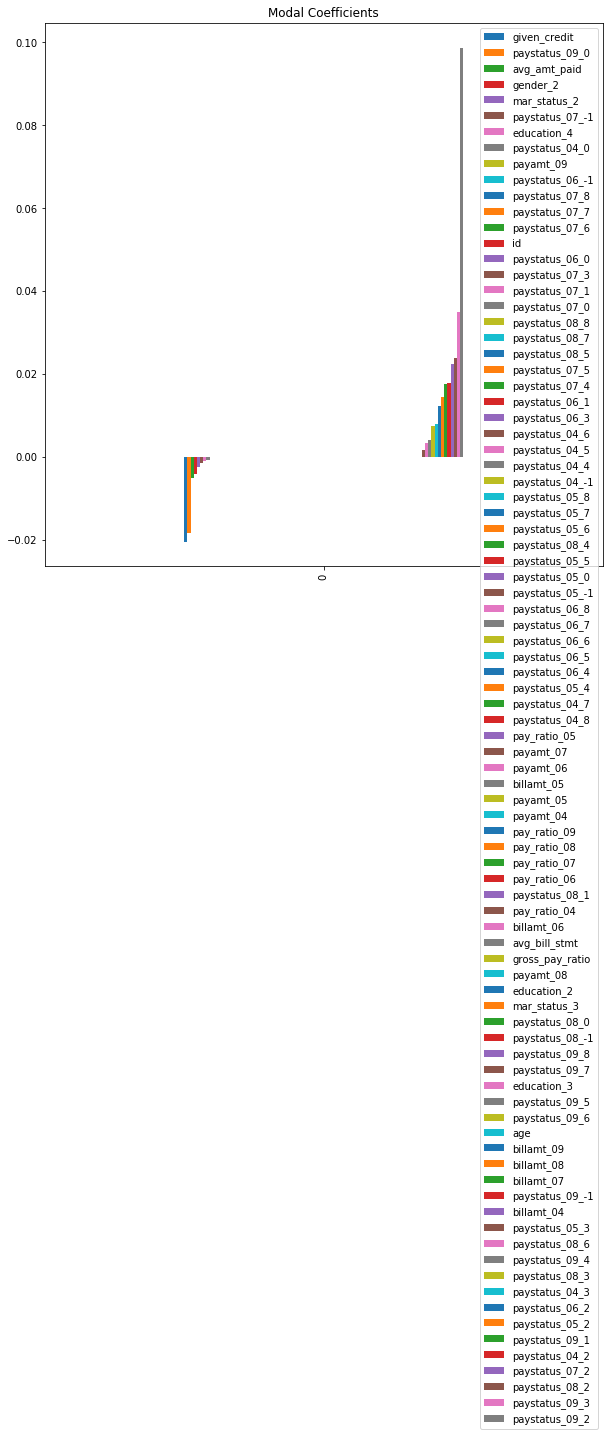

In [132]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train_fs.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

In [135]:
lasso_coef01

,given_credit,paystatus_09_0,avg_amt_paid,gender_2,mar_status_2,paystatus_07_-1,education_4,paystatus_04_0,payamt_09,paystatus_06_-1,...,paystatus_08_3,paystatus_04_3,paystatus_06_2,paystatus_05_2,paystatus_09_1,paystatus_04_2,paystatus_07_2,paystatus_08_2,paystatus_09_3,paystatus_09_2
0,-0.020475,-0.018287,-0.005035,-0.004079,-0.002473,-0.00155,-0.000967,-0.000729,-0.000007,-0.0,...,0.007464,0.007925,0.012357,0.014429,0.017694,0.017847,0.022461,0.023972,0.035014,0.098755


In [137]:
# assemble non-zero coefs
coef_keep = []
for i in lasso_coef01:
    for j in lasso_coef01[i]:
        if j > 0.0:
            coef_keep.append(i)
        elif j < 0.0:
            coef_keep.append(i)   


In [138]:
coef_keep

['given_credit',
 'paystatus_09_0',
 'avg_amt_paid',
 'gender_2',
 'mar_status_2',
 'paystatus_07_-1',
 'education_4',
 'paystatus_04_0',
 'payamt_09',
 'paystatus_05_3',
 'paystatus_08_6',
 'paystatus_09_4',
 'paystatus_08_3',
 'paystatus_04_3',
 'paystatus_06_2',
 'paystatus_05_2',
 'paystatus_09_1',
 'paystatus_04_2',
 'paystatus_07_2',
 'paystatus_08_2',
 'paystatus_09_3',
 'paystatus_09_2']

In [139]:
len(coef_keep)

22

In [140]:
coef_keep.append('defaulted')

In [141]:
coef_keep

['given_credit',
 'paystatus_09_0',
 'avg_amt_paid',
 'gender_2',
 'mar_status_2',
 'paystatus_07_-1',
 'education_4',
 'paystatus_04_0',
 'payamt_09',
 'paystatus_05_3',
 'paystatus_08_6',
 'paystatus_09_4',
 'paystatus_08_3',
 'paystatus_04_3',
 'paystatus_06_2',
 'paystatus_05_2',
 'paystatus_09_1',
 'paystatus_04_2',
 'paystatus_07_2',
 'paystatus_08_2',
 'paystatus_09_3',
 'paystatus_09_2',
 'defaulted']

In [143]:
# Compile df of most important features.
working_df = df[coef_keep]

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [144]:
target = working_df['defaulted']
features = working_df.drop(['defaulted'], axis=1)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.20)

In [146]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)

#transform the testing data
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

## KNN

In [149]:
knn = KNeighborsClassifier(n_neighbors=9)

In [150]:
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)

knn_f1 = metrics.f1_score(y_test, knn_preds)

knn_acc = metrics.accuracy_score(y_test, knn_preds)

print('Test F1 score: ', knn_f1)
print('Test Accuracy score: ', knn_acc)

Test F1 score:  0.4568911264946508
Test Accuracy score:  0.8082222222222222


## Logistic Regression

In [151]:
lr = LogisticRegression(class_weight='balanced')

In [152]:
lr.fit(X_train, y_train)

/Users/jventura/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
lr_preds = lr.predict(X_test)

lr_f1 = metrics.f1_score(y_test, lr_preds)

lr_acc = metrics.accuracy_score(y_test, lr_preds)

print('Test F1 score: ', lr_f1)
print('Test Accuracy score: ', lr_acc)

Test F1 score:  0.5302370585389453
Test Accuracy score:  0.7842222222222223


## Decision Tree

In [156]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

dtc_acc = metrics.accuracy_score(y_test, dtc_preds)

print('Test F1 score: ', dtc_f1)
print('Test Accuracy score: ', dtc_acc)

Test F1 score:  0.5184526456202757
Test Accuracy score:  0.7593333333333333


## Random Forest

In [157]:
rfc = RandomForestClassifier(random_state = 1, n_estimators=100, max_depth=9, max_features=3)

In [158]:
#fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [159]:
#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.4667981591058514
Test Accuracy score:  0.8197777777777778


## 6. Model Evaluation

### Voting Classifier

In [160]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', dtc)], 
                voting='soft')

In [162]:
voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

vc_acc = metrics.accuracy_score(y_test, vc_preds)

print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

/Users/jventura/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test F1 score:  0.529886914378029
Test Accuracy score:  0.806


### GridSearch CV - Logit

In [165]:
#create a dictionary of all the parameters you want to tune
param_grid = { 
    'C':[0.001,0.01,0.1,1],
    'penalty':['l1', 'l2']
}

In [163]:
lr_CV = LogisticRegression(random_state = 1, class_weight='balanced')

In [166]:
#create a grid search object and fit it to the data

lr_CV = GridSearchCV(estimator=lr_CV, param_grid=param_grid, cv= 5, scoring='f1', verbose=1, n_jobs=-1)
lr_CV.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.6s finished
/Users/jventura/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [167]:
### Identify the best params 
print(lr_CV.best_params_)
print(lr_CV.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [168]:
#Identify the best score during fitting with cross-validation
print(lr_CV.best_score_)

0.5335880649007242


In [169]:
#predict on the test set
test_preds_lr_CV = lr_CV.best_estimator_.predict(X_test)

# checking accuracy and F1
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_lr_CV))
print("F1:",metrics.f1_score(y_test, test_preds_lr_CV))

Accuracy: 0.7833333333333333
F1: 0.5292129406084016


In [170]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', dtc), ('randomforest', rfc), ('logregCV', lr_CV)], 
                voting='hard')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

vc_acc = metrics.accuracy_score(y_test, vc_preds)

print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

/Users/jventura/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.3s finished
/Users/jventura/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test F1 score:  0.5300462249614791
Test Accuracy score:  0.7966666666666666


### GridsearchCV - Random Forest

In [178]:
#create a dictionary of all the parameters you want to tune
param_grid2 = { 
    'n_estimators': [100, 200, 300, 400],
    'max_features': [.25, .5, .75],
    'max_depth' : [5, 10, 15],
    'criterion' : ['gini','entropy']
    
}

In [179]:
rfc_CV = RandomForestClassifier(random_state = 1, class_weight='balanced')

In [180]:
#create a grid search object and fit it to the data

rfc_CV = GridSearchCV(estimator=rfc_CV, param_grid=param_grid2, cv= 7, scoring='f1', verbose=1, n_jobs=-1)
rfc_CV.fit(X_train, y_train)

Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 35.2min finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             

In [181]:
# Identify the best params 
print(rfc_CV.best_params_)
print(rfc_CV.best_estimator_)


#Identify the best score during fitting with cross-validation
print(rfc_CV.best_score_)


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
0.5384653690053264


In [182]:
#predict on the test set
test_preds_rfc_CV = rfc_CV.best_estimator_.predict(X_test)

# checking accuracy and F1
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_rfc_CV))
print("F1:",metrics.f1_score(y_test, test_preds_rfc_CV))

Accuracy: 0.782
F1: 0.5383529411764707


In [183]:
#create a dictionary of all the parameters you want to tune
param_grid3 = { 
    'n_estimators': [400, 500],
    'max_features': [.2, .25],
    'max_depth' : [4, 5, 6, 7],
    'criterion' : ['gini']
    
}

In [184]:
rfc_CV2 = RandomForestClassifier(random_state = 1, class_weight='balanced')

In [185]:
#create a grid search object and fit it to the data

rfc_CV2 = GridSearchCV(estimator=rfc_CV2, param_grid=param_grid3, cv= 7, scoring='f1', verbose=1, n_jobs=-1)
rfc_CV2.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:  3.7min finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             

In [186]:
# Identify the best params 
print(rfc_CV2.best_params_)
print(rfc_CV2.best_estimator_)


#Identify the best score during fitting with cross-validation
print(rfc_CV2.best_score_)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.2, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=0.2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
0.5380691576989001


In [187]:
#predict on the test set
test_preds_rfc_CV2 = rfc_CV2.best_estimator_.predict(X_test)

# checking accuracy and F1
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_rfc_CV2))
print("F1:",metrics.f1_score(y_test, test_preds_rfc_CV2))


Accuracy: 0.7788888888888889
F1: 0.5361305361305362


In [188]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(random_state = 1, n_estimators=400, max_depth=5, max_features=.25, criterion='gini', class_weight='balanced')

In [189]:
#fit the model to the training data
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [190]:
#use the fitted model to predict on the test data
rfc2_preds = rfc2.predict(X_test)

rfc2_f1 = metrics.f1_score(y_test, rfc2_preds)
rfc2_acc = metrics.accuracy_score(y_test, rfc2_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc2_f1)
print('Test Accuracy score: ', rfc2_acc)

Test F1 score:  0.5383529411764707
Test Accuracy score:  0.782


In [191]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr_CV), ('decisiontree', dtc), ('randomforest', rfc2)], 
                voting='soft')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

vc_acc = metrics.accuracy_score(y_test, vc_preds)

print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.7s finished
/Users/jventura/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test F1 score:  0.536636794939378
Test Accuracy score:  0.8046666666666666


## 7. Final Model

In [195]:
df1 = pd.read_csv('holdout_data.csv', index_col=0)
df_bleh = pd.read_csv('training_data.csv')

In [196]:
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
5501,180000,2,2,1,44,0,0,0,0,0,...,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,...,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,...,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,...,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,...,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [204]:
#headers = df_bleh.drop(columns='Y').loc['id']

In [197]:
df_bleh.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,28835,220000,2,1,2,36,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,2,3,2,29,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
2,18894,180000,2,1,2,27,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [205]:
#df1.columns = df_bleh.drop(columns='Y').loc['Unnamed: 0']
df1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

In [247]:
def jps_df_pipeline(datafilecsv):
    '''
    pipeline function for data prossing of credit default data
    '''
    
    df = pd.read_csv(datafilecsv)
    
    cols = ['Unnamed: 0', 'X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
        
    rnm_dict = {'Unnamed: 0': 'id',
                'X1' :'given_credit',
                'X2' :'gender',
                'X3' :'education',
                'X4' :'mar_status',
                'X5' :'age',
                'X6' :'paystatus_09',
                'X7' :'paystatus_08',
                'X8' :'paystatus_07',
                'X9' :'paystatus_06',
                'X10':'paystatus_05',
                'X11':'paystatus_04',
                'X12':'billamt_09',
                'X13':'billamt_08',
                'X14':'billamt_07',
                'X15':'billamt_06',
                'X16':'billamt_05',
                'X17':'billamt_04',
                'X18':'payamt_09', 
                'X19':'payamt_08',
                'X20':'payamt_07',
                'X21':'payamt_06',
                'X22':'payamt_05',
                'X23':'payamt_04'
               }

    df.rename(columns = rnm_dict, inplace = True)

    df = df.dropna(axis=0)
    
    int_list = ['id', 'gender', 'education', 'mar_status', 'age', 'paystatus_09', 'paystatus_08', 'paystatus_07', 'paystatus_06', 'paystatus_05', 'paystatus_04']

    for i in int_list:
        df[i] = df[i].astype('int')
    
    df.sort_values(by='given_credit', ascending=False,inplace=True)
    
    df.education = np.where( df.education > 4, 4, df.education ) 
    df.education = np.where( df.education < 1, 4, df.education ) 
    
    df.mar_status = np.where( df.mar_status < 1, 3 , df.mar_status ) 
            
    ### FEATURE ENGINEERING
            
    df['pay_ratio_09'] = (df['payamt_09']/df['billamt_09'])
    df['pay_ratio_08'] = (df['payamt_08']/df['billamt_08'])
    df['pay_ratio_07'] = (df['payamt_07']/df['billamt_07'])
    df['pay_ratio_06'] = (df['payamt_06']/df['billamt_06'])
    df['pay_ratio_05'] = (df['payamt_05']/df['billamt_05'])
    df['pay_ratio_04'] = (df['payamt_04']/df['billamt_04'])
            
    df.pay_ratio_09.fillna(1, inplace=True)
    df.pay_ratio_08.fillna(1, inplace=True)
    df.pay_ratio_07.fillna(1, inplace=True)
    df.pay_ratio_06.fillna(1, inplace=True)
    df.pay_ratio_05.fillna(1, inplace=True)
    df.pay_ratio_04.fillna(1, inplace=True)
            
    df.pay_ratio_09 = np.where(((df.pay_ratio_09 < 0)|(df.pay_ratio_09 > 1)), 1, df.pay_ratio_09)
    df.pay_ratio_08 = np.where(((df.pay_ratio_08 < 0)|(df.pay_ratio_08 > 1)), 1, df.pay_ratio_08)
    df.pay_ratio_07 = np.where(((df.pay_ratio_07 < 0)|(df.pay_ratio_07 > 1)), 1, df.pay_ratio_07)
    df.pay_ratio_06 = np.where(((df.pay_ratio_06 < 0)|(df.pay_ratio_06 > 1)), 1, df.pay_ratio_06)
    df.pay_ratio_05 = np.where(((df.pay_ratio_05 < 0)|(df.pay_ratio_05 > 1)), 1, df.pay_ratio_05)
    df.pay_ratio_04 = np.where(((df.pay_ratio_04 < 0)|(df.pay_ratio_04 > 1)), 1, df.pay_ratio_04)
            
    df['avg_bill_stmt'] = (df.billamt_09 + df.billamt_08 + df.billamt_07 + df.billamt_06 + df.billamt_05 + df.billamt_04) / 6
    df['avg_amt_paid'] = (df.payamt_09 + df.payamt_08 + df.payamt_07 + df.payamt_06 + df.payamt_05 + df.payamt_04) / 6
    df['gross_pay_ratio']= df.avg_amt_paid / df.avg_bill_stmt
            
    
    df.gross_pay_ratio.fillna(1, inplace=True)
    df.replace(np.inf, 1, inplace=True)
    df.gross_pay_ratio = np.where(((df.gross_pay_ratio < 0)|(df.gross_pay_ratio > 1)), 1, df.gross_pay_ratio)
    
    df = pd.get_dummies(df, columns=['gender', 'education', 'mar_status', 'paystatus_09', 'paystatus_08',
       'paystatus_07', 'paystatus_06', 'paystatus_05', 'paystatus_04'], drop_first=True)
            
    ### feature selection was done using lasso.
    working_df = df[['given_credit',
                     'paystatus_09_0',
                     'avg_amt_paid',
                     'gender_2',
                     'mar_status_2',
                     'paystatus_07_-1',
                     'education_4',
                     'paystatus_04_0',
                     'payamt_09',
                     'paystatus_05_3',
                     'paystatus_08_6',
                     'paystatus_09_4',
                     'paystatus_08_3',
                     'paystatus_04_3',
                     'paystatus_06_2',
                     'paystatus_05_2',
                     'paystatus_09_1',
                     'paystatus_04_2',
                     'paystatus_07_2',
                     'paystatus_08_2',
                     'paystatus_09_3',
                     'paystatus_09_2']]
    
    scaler = StandardScaler()
    
    scaler.fit(working_df)
    
    scaled_df = pd.DataFrame(data = scaler.transform(working_df.drop()), columns = working_df.columns)
    
    return scaled_df
    


In [206]:
df = df1

In [220]:
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
5501,180000,2,2,1,44,0,0,0,0,0,...,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,...,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,...,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,...,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,...,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [246]:
import pickle 

rfc2_model  = rfc2
best_model = 'bestmodel.sav'
pickle.dump(rfc2_model, open(best_model, 'wb'))





In [156]:
df1 = df.astype(float)
df1['education']=np.where(df1['educationeducation'['education'])
df1['education']=np.where(data['education']<1,4,data['education'])
df1['mar_status']=np.where(data['mar_status']<1,3,data['mar_status'])

In [157]:
clean_df = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

In [158]:
clean_df['PAY_RATIO_1'] = (clean_df['PAY_AMT1']/clean_df['BILL_AMT1'])
clean_df['PAY_RATIO_2'] = (clean_df['PAY_AMT2']/clean_df['BILL_AMT2'])
clean_df['PAY_RATIO_3'] = (clean_df['PAY_AMT3']/clean_df['BILL_AMT3'])
clean_df['PAY_RATIO_4'] = (clean_df['PAY_AMT4']/clean_df['BILL_AMT4'])
clean_df['PAY_RATIO_5'] = (clean_df['PAY_AMT5']/clean_df['BILL_AMT5'])
clean_df['PAY_RATIO_6'] = (clean_df['PAY_AMT6']/clean_df['BILL_AMT6'])


In [159]:
clean_df.PAY_RATIO_1.fillna(1, inplace=True)
clean_df.PAY_RATIO_2.fillna(1, inplace=True)
clean_df.PAY_RATIO_3.fillna(1, inplace=True)
clean_df.PAY_RATIO_4.fillna(1, inplace=True)
clean_df.PAY_RATIO_5.fillna(1, inplace=True)
clean_df.PAY_RATIO_6.fillna(1, inplace=True)

In [160]:
clean_df.PAY_RATIO_1 = np.where(((clean_df.PAY_RATIO_1 < 0)|(clean_df.PAY_RATIO_1 > 1)), 1, clean_df.PAY_RATIO_1)
clean_df.PAY_RATIO_2 = np.where(((clean_df.PAY_RATIO_2 < 0)|(clean_df.PAY_RATIO_2 > 1)), 1, clean_df.PAY_RATIO_2)
clean_df.PAY_RATIO_3 = np.where(((clean_df.PAY_RATIO_3 < 0)|(clean_df.PAY_RATIO_3 > 1)), 1, clean_df.PAY_RATIO_3)
clean_df.PAY_RATIO_4 = np.where(((clean_df.PAY_RATIO_4 < 0)|(clean_df.PAY_RATIO_4 > 1)), 1, clean_df.PAY_RATIO_4)
clean_df.PAY_RATIO_5 = np.where(((clean_df.PAY_RATIO_5 < 0)|(clean_df.PAY_RATIO_5 > 1)), 1, clean_df.PAY_RATIO_5)
clean_df.PAY_RATIO_6 = np.where(((clean_df.PAY_RATIO_6 < 0)|(clean_df.PAY_RATIO_6 > 1)), 1, clean_df.PAY_RATIO_6)

In [161]:
clean_df['AVG_BILL_STMT'] = (clean_df['BILL_AMT1']+clean_df['BILL_AMT2']+clean_df['BILL_AMT3']+clean_df['BILL_AMT4']+clean_df['BILL_AMT5']+clean_df['BILL_AMT6'])/6
clean_df['AVG_AMT_PAID'] = (clean_df['PAY_AMT1']+clean_df['PAY_AMT2']+clean_df['PAY_AMT3']+clean_df['PAY_AMT4']+clean_df['PAY_AMT5']+clean_df['PAY_AMT6'])/6


In [162]:
clean_df['PAY_RATIO']= clean_df['AVG_AMT_PAID']/clean_df['AVG_BILL_STMT']

In [163]:
clean_df.PAY_RATIO.fillna(1, inplace=True)
clean_df.replace(np.inf, 1, inplace=True)
clean_df.PAY_RATIO = np.where(((clean_df.PAY_RATIO < 0)|(clean_df.PAY_RATIO > 1)), 1, clean_df.PAY_RATIO)

In [165]:
working_df = clean_df[['PAY_0_0.0','LIMIT_BAL','AVG_AMT_PAID','PAY_3_-1.0','MARRIAGE_2.0','EDUCATION_4.0','PAY_5_7.0','PAY_2_6.0','PAY_0_7.0','PAY_3_6.0','PAY_5_3.0','PAY_4_7.0','PAY_3_3.0','PAY_0_4.0','PAY_2_3.0','PAY_6_3.0','PAY_4_2.0','PAY_0_1.0','PAY_3_2.0','PAY_6_2.0','PAY_5_2.0','PAY_2_2.0','PAY_0_3.0','PAY_0_2.0']]

In [166]:
working_df.head()

,PAY_0_0.0,LIMIT_BAL,AVG_AMT_PAID,PAY_3_-1.0,MARRIAGE_2.0,EDUCATION_4.0,PAY_5_7.0,PAY_2_6.0,PAY_0_7.0,PAY_3_6.0,PAY_5_3.0,PAY_4_7.0,PAY_3_3.0,PAY_0_4.0,PAY_2_3.0,PAY_6_3.0,PAY_4_2.0,PAY_0_1.0,PAY_3_2.0,PAY_6_2.0,PAY_5_2.0,PAY_2_2.0,PAY_0_3.0,PAY_0_2.0
5501,1,180000.0,8000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28857,0,130000.0,1007.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11272,0,60000.0,111.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
8206,1,240000.0,6991.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6362,0,100000.0,2352.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [168]:
scaled_df = pd.DataFrame(data = scaler.transform(working_df), columns = working_df.columns)

In [248]:
holdout_df = jps_df_pipeline('holdout_data.csv')

In [249]:
rfc2.predict(holdout_df)

array([0, 0, 0, ..., 1, 1, 1])

In [250]:
yhat = rfc2.predict(holdout_df)

In [251]:
rfc2.predict(holdout_df).mean()

0.26369817357685643

In [255]:
rfc2_f1 = metrics.f1_score(df.defaulted,yhat)

rfc2_acc = metrics.accuracy_score(df.defaulted, yhat)

print('Test F1 score: ', rfc2_f1)
print('Test Accuracy score: ', rfc2_acc)

ValueError: Found input variables with inconsistent numbers of samples: [4500, 17999]

In [174]:
np.savetxt('default_preds_JV.csv', yhat, delimiter=",")

In [253]:
pd.DataFrame(yhat).to_csv("_default_preds_JV.csv", header=None)

In [232]:
holdout_df = jps_df_pipeline('holdout_data.csv')

In [233]:
y_hat = rfc2.predict(holdout_df)

In [234]:
y_hat.mean()

0.25223303559525395

In [235]:
y_hat

array([0, 0, 0, ..., 1, 1, 1])

In [236]:
pd.DataFrame(y_hat).to_csv('default_preds_JV.csv', header= None)

In [240]:
y_hat[0:30]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [237]:
y_hat.shape

(7501,)